# Mega Case Study

In this study we'll go from Unsupervised learning to Supervised learning.

## Idnetifying potential frauds using Self organising maps

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import bone, pcolor, colorbar, plot, show
%pylab inline

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from minisom import MiniSom

import os
import tensorflow
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
from keras.models import Sequential
from keras.layers import Dense

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
dataset.head()
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
minMaxScaler = MinMaxScaler(feature_range = (0, 1))
X = minMaxScaler.fit_transform(X)

In [3]:
miniSom = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
miniSom.random_weights_init(X)
miniSom.train_random(data = X, num_iteration = 100)

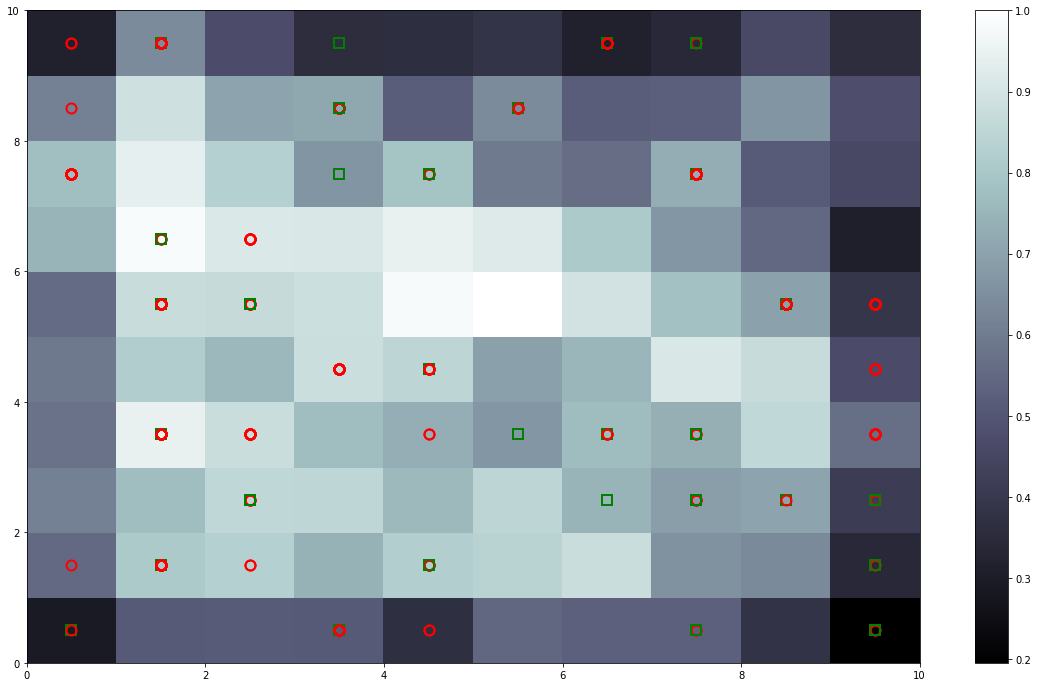

In [4]:
plt.figure(figsize = (20, 12))
bone()
pcolor(miniSom.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = miniSom.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, 
         markers[y[i]], 
         markeredgecolor = colors[y[i]], 
         markerfacecolor = 'None', 
         markersize = 10, 
         markeredgewidth = 2)

In [5]:
mappings = miniSom.win_map(X)
frauds = np.concatenate((mappings[1, 6], mappings[1, 3]), axis = 0)
frauds = minMaxScaler.inverse_transform(frauds)

## Identifying the frauds using Neural Networks

In [6]:
customers = dataset.iloc[:, 1:].values

In [7]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i, 0] in frauds:
        is_fraud[i] = 1

In [8]:
standardScaler = StandardScaler()
customers = standardScaler.fit_transform(customers)

In [9]:
classifier = Sequential()
# First hidden layer
classifier.add(Dense(output_dim = 2, init = 'uniform', activation = 'relu', input_dim = 15))
# Output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
# Model compilation
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


/Users/k.bhanot/Personal/Important Work/Deep Learning/Deep-Learning-A-Z-Coursework/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=15, units=2, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/k.bhanot/Personal/Important Work/Deep Learning/Deep-Learning-A-Z-Coursework/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """


In [10]:
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
690/690 [==============================] - 1s 983us/step - loss: 0.5134 - acc: 0.9551
Epoch 2/10
690/690 [==============================] - 1s 741us/step - loss: 0.2231 - acc: 0.9565
Epoch 3/10
690/690 [==============================] - 1s 793us/step - loss: 0.1558 - acc: 0.9565
Epoch 4/10
690/690 [==============================] - 1s 726us/step - loss: 0.1382 - acc: 0.9565
Epoch 5/10
690/690 [==============================] - 0s 713us/step - loss: 0.1266 - acc: 0.9565
Epoch 6/10
690/690 [==============================] - 0s 723us/step - loss: 0.1174 - acc: 0.9565
Epoch 7/10
690/690 [==============================] - 0s 724us/step - loss: 0.1089 - acc: 0.9565
Epoch 8/10
690/690 [==============================] - 1s 729us/step - loss: 0.1014 - acc: 0.9565
Epoch 9/10
690/690 [==============================] - 1s 727us/step - loss: 0.0953 - acc: 0.9565
Epoch 10/10
690/690 [==============================] - 1s 732us/step - loss: 0.

In [11]:
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)

In [12]:
y_pred = y_pred[y_pred[:, 1].argsort()]

We can take a look at the top 40 people with the highest chance of fraud.

In [13]:
pd.DataFrame(y_pred[-40:], columns = ['Customer Id', 'Probability of Fraud'])

,Customer Id,Probability of Fraud
0,15676156.0,0.249034
1,15796413.0,0.263478
2,15604196.0,0.266518
3,15587266.0,0.266971
4,15686913.0,0.279516
5,15670646.0,0.282288
6,15597709.0,0.283725
7,15599440.0,0.284506
8,15624423.0,0.285308
9,15673238.0,0.285604
